# Mesh Generation and boundary conditions

## Contents

- [Creating a Standard Mesh on domains with simple shape](#1)

  * [One-dimensional meshes](#1.1)
  
  * [Two-dimensional meshes](#1.2)
  
  * [Three-dimensional meshes](#1.3)

- [Generating meshes for complex domains](#2)
- [Importing Mesh Geometry](#3)
- [Defining subdomains and boundary conditions](#4)

## MESH GENERATION IN FENICS

### How to build the meshes?


This tutorial demonstrates how to create meshes using the meshing utility provided by FEniCS in different types of domains.

Fenics has a few tools for creating various types of meshes over domains with simple shape:

    * 1D mesh: UnitIntervalMesh, IntervalMesh,
    
    * 2D mesh: UnitSquareMesh, RectangleMesh and generate_mesh
    
    * 3D volume mesh: UnitCubeMesh, BoxMesh and generate_mesh.

# 1

<div class="alert alert-danger">
<font size="5"><strong>Creating a Standard Mesh on domains with simple shape</strong></font>
</div>

## 1.1

<div class="alert alert-warning">
<font size="5"><strong>One-dimensional meshes</strong></font>
</div>

Meshes in one-dimension can be constructed using the FEniCS functions: `UnitInterval` and `Interval`.

The following example triangulates the unit interval $ (0,1)$, the mesh is plotted and the resulting graphic is saved  as a PNG file and `mesh.num_cells()` represents the number of cells (segments) in the mesh.

In [1]:
# Install FEniCS
try:
    import dolfin
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/fenics-install-real.sh" -O "/tmp/fenics-install.sh" && bash "/tmp/fenics-install.sh"
    import dolfin

--2024-02-13 11:48:24--  https://fem-on-colab.github.io/releases/fenics-install-real.sh
Resolving fem-on-colab.github.io (fem-on-colab.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to fem-on-colab.github.io (fem-on-colab.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4161 (4.1K) [application/x-sh]
Saving to: ‘/tmp/fenics-install.sh’

/tmp/fenics-install 100%[===================>]   4.06K  --.-KB/s    in 0s      

2024-02-13 11:48:24 (37.2 MB/s) - ‘/tmp/fenics-install.sh’ saved [4161/4161]

+ INSTALL_PREFIX=/usr/local
++ echo /usr/local
++ awk -F/ '{print NF-1}'
+ INSTALL_PREFIX_DEPTH=2
+ PROJECT_NAME=fem-on-colab
+ SHARE_PREFIX=/usr/local/share/fem-on-colab
+ FENICS_INSTALLED=/usr/local/share/fem-on-colab/fenics.installed
+ [[ ! -f /usr/local/share/fem-on-colab/fenics.installed ]]
+ PYBIND11_INSTALL_SCRIPT_PATH=https://github.com/fem-on-colab/fem-on-colab.github.io/raw/76536e9/releases/pybind11-inst

 number of cells =  10
Plotting a UnitIntervalMesh
Graphics saved as 'unitintervalmesh.png'


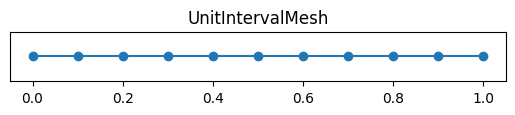

In [3]:
%matplotlib inline
#
from fenics import *
from mshr import *
import matplotlib.pyplot as plt

#
#  Unit interval [0,1]
#
mesh = UnitIntervalMesh( 10 )
print (" number of cells = ",mesh.num_cells())
print ( "Plotting a UnitIntervalMesh" )
plot( mesh, title = "UnitIntervalMesh" )
filename = 'unitintervalmesh.png'
plt.savefig ( filename )
print("Graphics saved as '%s'" % filename )

 number of cells =  10
Plotting an IntervalMesh


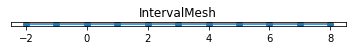

In [ ]:
#
#  Any interval [a,b]
#
a = -2.0
b = 8.0
mesh = IntervalMesh ( 10, a, b )
print (" number of cells = ",mesh.num_cells())
print ( "Plotting an IntervalMesh"  )
plot ( mesh, title = "IntervalMesh" )

## 1.2


<div class="alert alert-warning">
<font size="5"><strong>Discretizing two-dimensional domains into triangular finite element meshes</strong></font>
</div>

Meshes in two-dimension can be constructed using the FEniCS functions: `UnitSquareMesh, RectangleMesh, UnitCircle` and `Ellipse`.

The following example shows how to create a structured mesh on the unit square.
The first two arguments of `UnitSquareMesh` gives the number of cells in the x and y directions.
Another parameter(optional) of the `UnitSquareMesh`function can used to indicate the direction of the diagonals and can be set to `left`, `right`, `right/left`, `left/right`, or `crossed`.

 number of cells =  50
Plotting a UnitSquareMesh


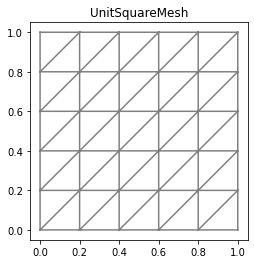

In [ ]:
#
#  Unit square
#  mesh.num_cells() represents the number of cells (triangles) in the mesh
#
mesh = UnitSquareMesh ( 5, 5 )
print (" number of cells = ",mesh.num_cells())
print ( "Plotting a UnitSquareMesh" )
plot ( mesh, title = "UnitSquareMesh" )

 number of cells =  50
Plotting a UnitSquareMesh


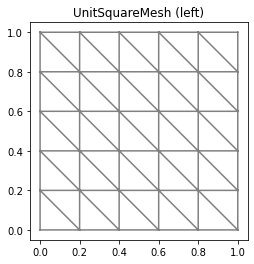

In [ ]:
#
#  Unit square with "left" option.
#
mesh = UnitSquareMesh ( 5, 5, "left" )
print (" number of cells = ",mesh.num_cells())
print ( "Plotting a UnitSquareMesh" )
plot ( mesh, title = "UnitSquareMesh (left)" )

 number of cells =  50
 Plotting a UnitSquareMesh


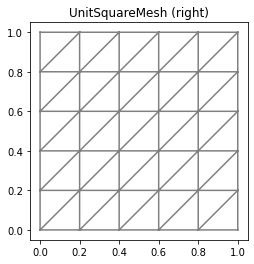

In [ ]:
#
#  Unit square with "right" option.
#
mesh = UnitSquareMesh ( 5, 5, "right" )
print (" number of cells = ",mesh.num_cells())
print (" Plotting a UnitSquareMesh" )
plot ( mesh, title = "UnitSquareMesh (right)" )

 number of cells =  100
Plotting a UnitSquareMesh


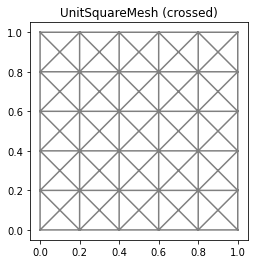

In [ ]:
#
#  Unit square with "crossed" option.
#
mesh = UnitSquareMesh ( 5, 5, "crossed" )
print (" number of cells = ",mesh.num_cells())
print ( "Plotting a UnitSquareMesh" )
plot ( mesh, title = "UnitSquareMesh (crossed)" )

 number of cells =  50
Plotting a UnitSquareMesh


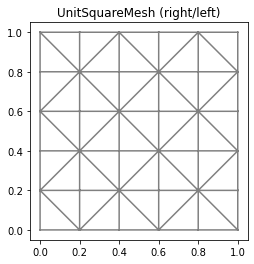

In [ ]:
#
#  Unit square with "right/left" option.
#
mesh = UnitSquareMesh ( 5, 5, "right/left" )
print (" number of cells = ",mesh.num_cells())
print ( "Plotting a UnitSquareMesh" )
plot ( mesh, title = "UnitSquareMesh (right/left)" )

 number of cells =  50
Plotting a UnitSquareMesh


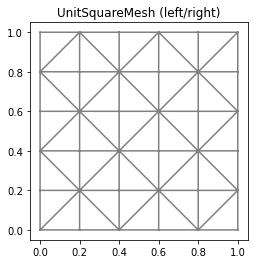

In [ ]:
#
#  Unit square with "left/right" option.
#
mesh = UnitSquareMesh ( 5, 5, "left/right" )
print (" number of cells = ",mesh.num_cells())
print ( "Plotting a UnitSquareMesh" )
plot ( mesh, title = "UnitSquareMesh (left/right)" )

<div class="alert alert-warning">
<font size="5"><strong>Triangular mesh on a rectangular domain:</strong></font>
</div

The following example shows how to create a structured mesh on a rectangular domain. The first two arguments of RectangleMesh define the opposite corners of the rectangle, the third and the fourth give the number of cells in the x and y directions. The last optional argument indicates the direction of the diagonals and can be set to `left`, `right`, `right/left`, `left/right`, or `crossed`.

 number of cells =  80
Plotting a RectangleMesh


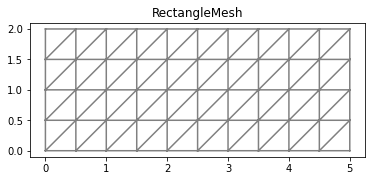

In [ ]:
#
#  Rectangle with A and B corners specified.
#
A = Point ( 0.0, 0.0 )
B = Point ( 5.0, 2.0 )
mesh = RectangleMesh ( A, B, 10, 4 )
print (" number of cells = ",mesh.num_cells())
print ( "Plotting a RectangleMesh" )
plot ( mesh, title = "RectangleMesh")

 number of cells =  200
Plotting a RectangleMesh


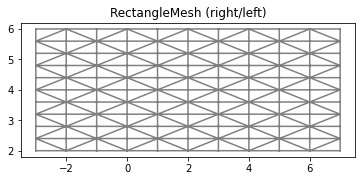

In [ ]:
#
#  Rectangle with "right/left" option.
#
A = Point ( -3.0, 2.0 )
B = Point ( 7.0, 6.0 )
mesh = RectangleMesh ( A, B, 10, 10, "right/left" )
print (" number of cells = ",mesh.num_cells())
print ( "Plotting a RectangleMesh" )
plot ( mesh, title = "RectangleMesh (right/left)" )

<div class="alert alert-warning">
<font size="5"><strong>Quadrilateral mesh on a unit square:</strong></font>
</div
    
In the next example, the unit square is discretized by the quadrilateral elements of 64 on each side.

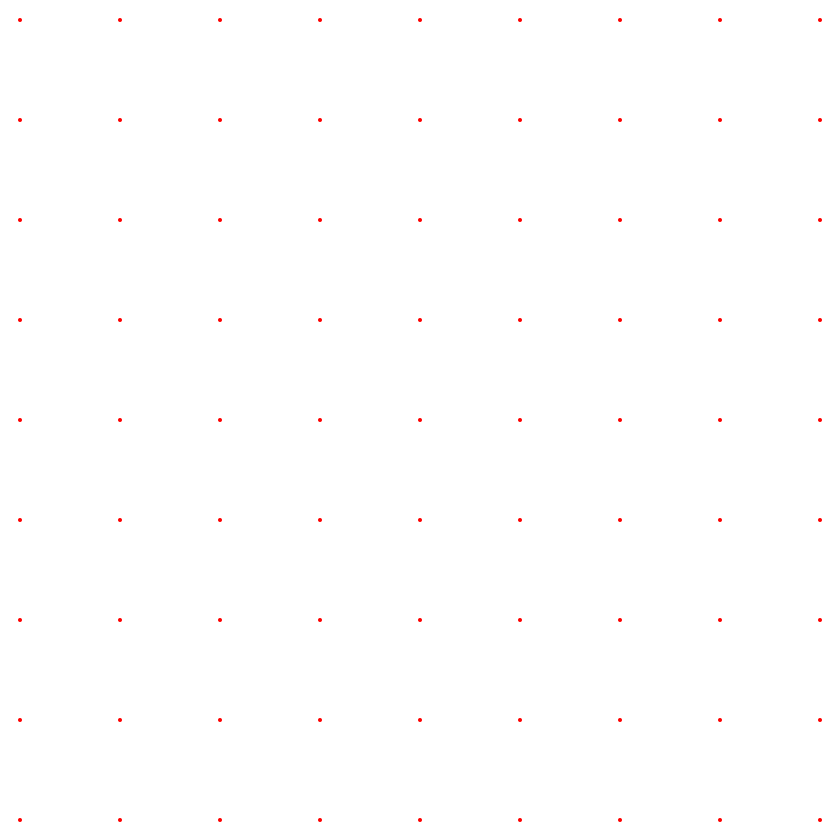

In [4]:
#
#  Create a quadrilateral mesh on the unit square.
#
mesh = UnitSquareMesh.create ( 8, 8, CellType.Type.quadrilateral )
#plot ( mesh, title = "RectangleMesh" )
mesh

<div class="alert alert-warning">
<font size="5"><strong>Triangular mesh on a circular domain:</strong></font>
</div

 number of cells =  1568
Plotting a Circle Mesh


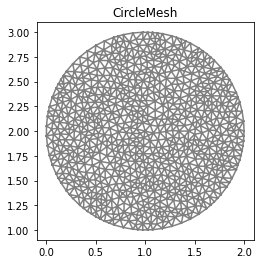

In [ ]:
#
#  Circle.
#
center = Point ( 1.0, 2.0 )
r = 1.0
resolution = 20
mesh = generate_mesh ( Circle ( center, r ), resolution )
print (" number of cells = ",mesh.num_cells())
print ( "Plotting a Circle Mesh" )
plot ( mesh, title = "CircleMesh" )

<div class="alert alert-warning">
<font size="5"><strong>Triangular mesh of an ellipse:</strong></font>
</div>

 number of cells =  233


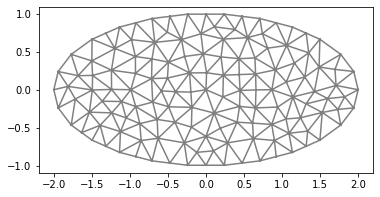

In [ ]:
#
# Ellipse
#
center = Point(0.0,0.0)
r_x = 2.0
r_y = 1.0
e = Ellipse(center, r_x, r_y)
resolution = 10
mesh = generate_mesh(e,resolution)
print (" number of cells = ",mesh.num_cells())
plot(mesh)

## 1.3

<div class="alert alert-warning">
<font size="5"><strong>Three-dimensional meshes:</strong></font>
</div>

In [5]:
#
#  Unit cube.
#
mesh1 = UnitCubeMesh(4, 4, 4)
#print ("Plotting a UnitCubeMesh")
print (" number of cells = ",mesh1.num_cells())
mesh1

 number of cells =  384


In [6]:
#
#  Box, with A and B corner points.
#
A = Point ( 0.0, 0.0, 0.0 )
B = Point ( 10.0, 4.0, 2.0 )
mesh = BoxMesh ( A, B, 10, 10, 10 )
print (" number of cells = ",mesh.num_cells())
#print ( "Plotting a BoxMesh" )
#plot ( mesh, title = "BoxMesh" )
mesh

 number of cells =  6000


In [7]:
#
#  Cone, A and B points: centers at each end
#
A = Point( 0.0, 0.0, -1.0 )
B = Point( 0.0, 0.0, 1.0 )
r1 = 0.5
r2 = 32
#c = Cone(Point( 0.0, 0.0, -1.0 ), Point( 0.0, 0.0, 1.0 ), 0.5, 32)
c = Cone(A, B, r1, r2)
resolution = 16
mesh = generate_mesh(c, resolution)
print (" number of cells = ",mesh.num_cells())
#plot(m)
mesh

 number of cells =  1252


In [8]:
#
#  Sphere.
#
center = Point ( 1.0, 2.0, 3.0 )
radius = 1
resolution = 32
mesh = generate_mesh ( Sphere ( center, radius ), resolution)
print (" number of cells = ",mesh.num_cells())
#print ( "Plotting a Sphere Mesh" )
#plot ( mesh, title = 'Sphere Mesh' )
mesh

 number of cells =  75524


# 2

<div class="alert alert-danger">
<font size="5"><strong>Generating meshes for complex domain</strong></font>
</div>

To create the mesh, we use boolean operators from **mshr** module. First we start by defining domains with simple shape: squares, rectangles, circles and ellipses, then combine them with operators **+ (union), (intersection)** and **- (set difference)**.

The following example shows how to generate mesh in planar domain with polygonal boundaries.

 number of cells =  6000


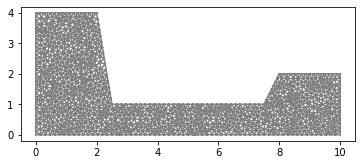

In [ ]:
# Create list of polygonal domain vertices
domain_vertices = [Point(0.0, 0.0),
                   Point(10.0, 0.0),
                   Point(10.0, 2.0),
                   Point(8.0, 2.0),
                   Point(7.5, 1.0),
                   Point(2.5, 1.0),
                   Point(2.0, 4.0),
                   Point(0.0, 4.0),
                   Point(0.0, 0.0)]
#
# Generate mesh and plot
domain = Polygon(domain_vertices)
#
mesh3 = generate_mesh(domain,40)
print (" number of cells = ",mesh.num_cells())
plot(mesh3)

 The following example shows how to generate mesh in L-shaped domain $Ω = [−1, 1] \times [−1, 1]  - [0, 1] \times [0, −1].$.

 number of cells =  5812


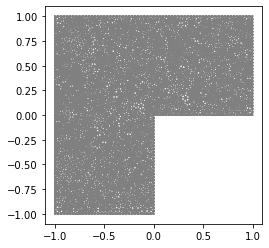

In [ ]:
#
square = Rectangle(Point(-1, -1), Point(1, 1))
cutout = Rectangle(Point(+0, -1), Point(1, 0))
domain = square - cutout
mesh = generate_mesh(domain, 50)
plot(mesh)
print (" number of cells = ",mesh.num_cells())

 number of cells =  1080


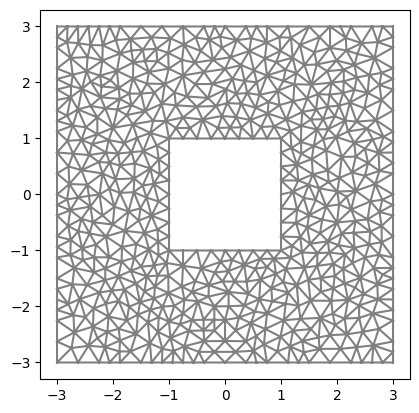

In [10]:
#
square = Rectangle(Point(-3, -3), Point(3, 3))
cutout = Rectangle(Point(-1, -1), Point(1, 1))
domain = square - cutout
mesh = generate_mesh(domain, 20)
plot(mesh)
print (" number of cells = ",mesh.num_cells())

<div class="alert alert-warning">
<font size="5"><strong>Meshing domains with holes:</strong></font>
</div>

In the following examples, complex geometries are constructed from simple geometric primitives by means of boolean operations(union, intersection and difference  operations).

The next example shows how to generate mesh in a rectangular domain with a rectangular hole.

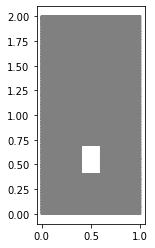

In [ ]:
res = 100
r1 = Rectangle(Point(0,0), Point(1,2))
r2 = Rectangle(Point(0.4, 0.4), Point(0.6, 0.7))

# Define domain and resolution
domain = r1 - r2
res = 100
#
# Generate mesh
#
mesh = generate_mesh(domain, res)
plot(mesh)

The following examples show how to generate mesh in a rectangular domain with a circular hole and circular domain with a rectangular holes.

Plotting a Circle Minus Rectangle Mesh


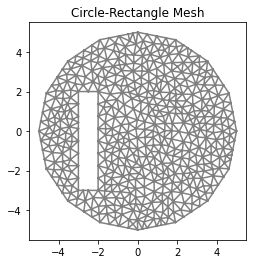

In [ ]:
#
# the rectangular hole
#  Circle minus rectangle.
#
center = Point ( 0.0, 0.0 )
radius = 5.0
A = Point ( -3.0, -3.0 )
B = Point ( -2.0, 2.0 )
domain = Circle ( center, radius, segments = 16 ) \
        - Rectangle ( A, B )
mesh = generate_mesh ( domain, 16 )
print ( "Plotting a Circle Minus Rectangle Mesh" )
plot ( mesh, title = "Circle-Rectangle Mesh" )

#geom = Rectangle(Point(0,0),Point(1,1)) - Circle(Point(.5,.5), .35)
#plot(generate_mesh(geom, 20, 'cgal'))

Plotting a Rectangle Minus Circle Mesh


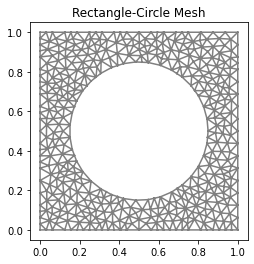

In [ ]:
#
# the rectangular hole
# Rectangle minus circle.
#
center = Point ( 0.5, 0.5 )
radius = 0.35
A = Point ( 0.0, 0.0 )
B = Point ( 1.0, 1.0 )
domain = Rectangle(A,B) - Circle(center, radius)
mesh = generate_mesh ( domain, 20 )
print ( "Plotting a Rectangle Minus Circle Mesh" )
plot(mesh, title = "Rectangle-Circle Mesh")

# 3
# Importing Mesh Geometry

Fenics can read meshes in Gmsh, triangle, CGNS, and Exodus formats. The **xml** file format of Fenics is supported and can be loaded such as:

```
mesh = Mesh("name_file.xml")
```

# Loading external meshes

Meshes created with external solver can be converted to the Fenics XML format. For example, dolfin-convert can be used to convert a GMSH file to XML file format:

```
dolfin-convert file_name.msh file_name.xml
```

and loaded with:

```
mesh = Mesh("file_name.xml")
```
### Example:

Gmsh

 number of cells =  6408


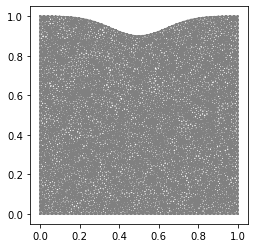

In [ ]:
from fenics import *
mesh = Mesh("cape.xml")
plot(mesh)
print (" number of cells = ",mesh.num_cells())

# 4
<div class="alert alert-danger">
<font size="5"><strong>Defining subdomains and boundary conditions</strong></font>
</div>

Domains and Boundaries may be defined in FEniCS by defining Python functions that return `True` or `False` depending on whether a point should be considered part of the domain or boundary, such as

```
def set_1(x, on_boundary):
    return near(x[0], 0)
```
This function defines the boundary to be all points with $x$-coordinate equal to (near) zero. The `near` function comes from FEniCS and performs a test with tolerance: `abs(x[0] - 0) < 3E-16`.

More general method to create a subdomain is to use the class **SubDomain** coupled with **inside** function, such as:

```
# Create classes for defining part of  the interior of the domain

class Obstacle(SubDomain):
    def inside(self, x, on_boundary):
        return (between(x[1], (0.5, 0.7)) and between(x[0], (0.2, 1.0)))

# Initialize sub-domain instances
obstacle = Obstacle()
```

In FEniCS, two classes **SubDomain** and **MeshFunction** can be used to access the subdomains and solve PDEs in domains made up of different materials and multiple boundary conditions.

```
# Domain dimension
dim = mesh.topology().dim()

# Mesh Function on the boundary
facet_domains = MeshFunction("size_t", mesh, dim-1, mesh.domains())

# Mesh Function on the domain
cell_domains = MeshFunction("size_t", mesh, dim, mesh.domains())
```

### Example 1.

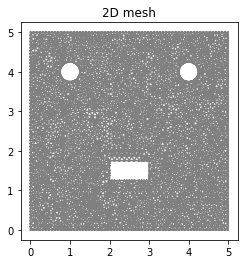

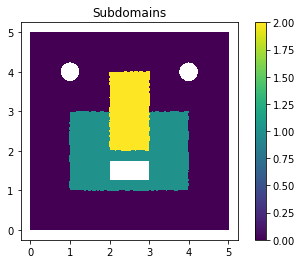

In [ ]:
# Define 2D geometry

domain = Rectangle(Point(0., 0.), Point(5., 5.)) - Rectangle(Point(2., 1.25), Point(3., 1.75)) - Circle(Point(1, 4), .25, 32) - Circle(Point(4, 4), .25, 32)

# Define the subdomains r3 and r4

r3 = Rectangle(Point(1,1), Point(4,3))
r4 = Rectangle(Point(2,2), Point(3,4))

# Mark r3 as sub domain 1
domain.set_subdomain(1, r3)
# Mark r4 as sub domain 2
domain.set_subdomain(2, r4)

# Generate and plot mesh
mesh2d = generate_mesh(domain, 45)
plot(mesh2d, title='2D mesh')

# Convert subdomains to mesh function
mf = MeshFunction("size_t", mesh2d, 2, mesh2d.domains())

# Plot the subdomains
plt.figure()
c=plot(mf, title='Subdomains')
plt.colorbar(c)
plt.show()

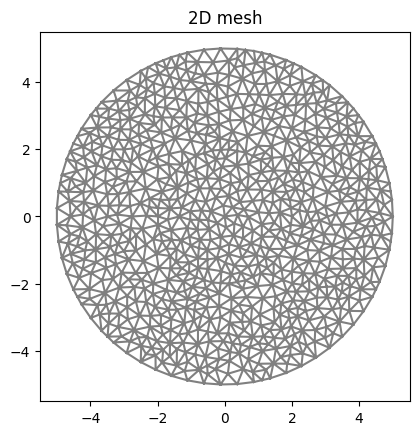

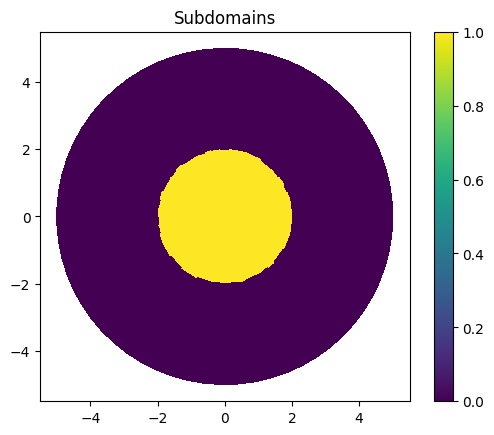

In [12]:
domain = Circle(Point(0, 0), 5)

r3 = Circle(Point(0, 0), 2)

# Mark r3 as sub domain 1
domain.set_subdomain(1, r3)

# Generate and plot mesh
mesh2d = generate_mesh(domain, 20)
plot(mesh2d, title='2D mesh')

# Convert subdomains to mesh function
mf = MeshFunction("size_t", mesh2d, 2, mesh2d.domains())

# Plot the subdomains
plt.figure()
c=plot(mf, title='Subdomains')
plt.colorbar(c)
plt.show()

### Example 2.

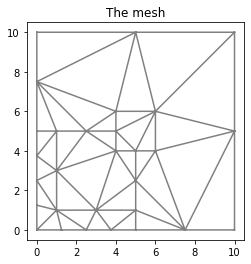

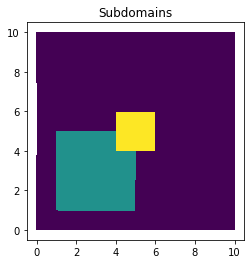

In [ ]:
# Define 2D geometry

domain = Rectangle(Point(0,0), Point(10,10))

# Define the subdomains r1 and r2

r1 = Rectangle(Point(1,1), Point(5,5))
r2 = Rectangle(Point(4,4), Point(6,6))

# Mark r1 as sub domain 1
domain.set_subdomain(1, r1)
# Mark r2 as sub domain 2
domain.set_subdomain(2, r2)

# Generate the mesh
mesh = generate_mesh(domain, 1)

# Save the mesh and plot mesh
File("mesh.xml") << mesh
plot(mesh,title='The mesh')

# Convert subdomains to mesh function
mf = MeshFunction('size_t', mesh, 2, mesh.domains())

# Save the subdomains and plot subdomains
File("mf.xml") << mf
plt.figure()
plot(mf, title='Subdomains')

### Example 3.

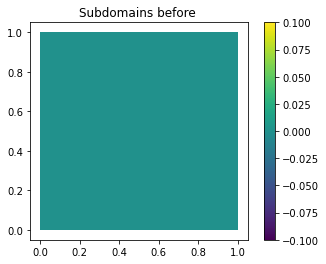

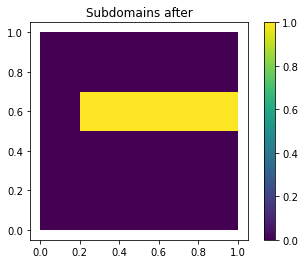

In [ ]:
from dolfin import *

# Create classes for defining part of  the interior of the domain

class Obstacle(SubDomain):
    def inside(self, x, on_boundary):
        return (between(x[1], (0.5, 0.7)) and between(x[0], (0.2, 1.0)))

# Initialize sub-domain instances
obstacle = Obstacle()

# Define mesh
mesh = UnitSquareMesh(10, 10)

# Initialize mesh function for interior domains

domains = MeshFunction("size_t", mesh, 2, mesh.domains())
domains.set_all(0)
c= plot(domains, title='Subdomains before ')
plt.colorbar(c)
plt.show()


# # Mark the subdomains obstacle as sub domain 1

plt.figure()
obstacle.mark(domains, 1)
a = plot(domains, title='Subdomains after')
plt.colorbar(a)
plt.show()
#plot(mesh)

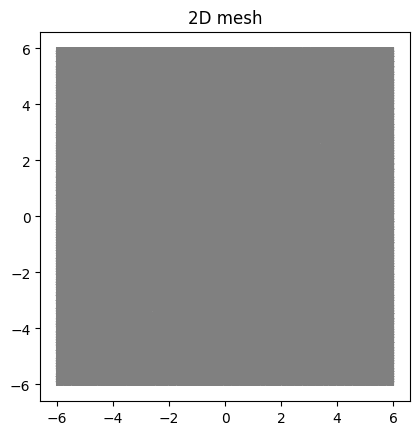

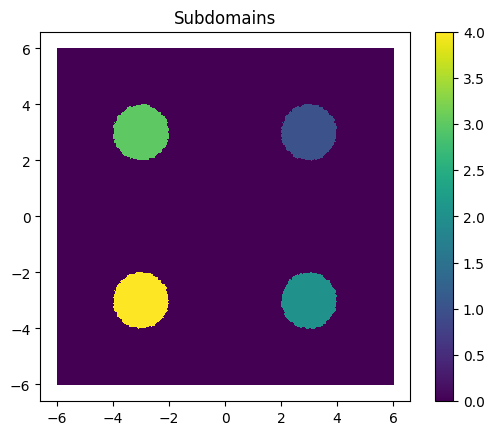

In [17]:
domain = Rectangle(Point(-6,6), Point(6,-6))

r3 = Circle(Point(3, 3), 1)
r4 = Circle(Point(3, -3), 1)
r5 = Circle(Point(-3, 3), 1)
r6 = Circle(Point(-3, -3), 1)


# Mark r3 as sub domain 1
domain.set_subdomain(1, r3)
domain.set_subdomain(2, r4)
domain.set_subdomain(3, r5)
domain.set_subdomain(4, r6)

# Generate and plot mesh
mesh2d = generate_mesh(domain, 100)
plot(mesh2d, title='2D mesh')

# Convert subdomains to mesh function
mf = MeshFunction("size_t", mesh2d, 2, mesh2d.domains())

# Plot the subdomains
plt.figure()
c=plot(mf, title='Subdomains')
plt.colorbar(c)
plt.show()

### Example 4.

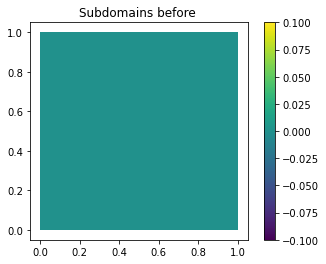

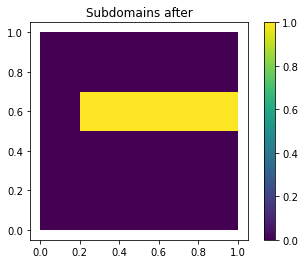

In [ ]:
from dolfin import *

# Create classes for defining parts of the boundaries and the interior
# of the domain
class Left(SubDomain):
    def inside(self, x, on_boundary):
        return near(x[0], 0.0)

class Right(SubDomain):
    def inside(self, x, on_boundary):
        return near(x[0], 1.0)

class Bottom(SubDomain):
    def inside(self, x, on_boundary):
        return near(x[1], 0.0)

class Top(SubDomain):
    def inside(self, x, on_boundary):
        return near(x[1], 1.0)

class Obstacle(SubDomain):
    def inside(self, x, on_boundary):
        return (between(x[1], (0.5, 0.7)) and between(x[0], (0.2, 1.0)))

# Initialize sub-domain instances
left = Left()
top = Top()
right = Right()
bottom = Bottom()
obstacle = Obstacle()

# Define mesh
mesh = UnitSquareMesh(10, 10)

# Initialize mesh function for interior domains

domains = MeshFunction("size_t", mesh, 2, mesh.domains())
domains.set_all(0)
c= plot(domains, title='Subdomains before ')
plt.colorbar(c)
plt.show()


# # Mark the subdomains obstacle as sub domain 1

plt.figure()
obstacle.mark(domains, 1)
a = plot(domains, title='Subdomains after')
plt.colorbar(a)
plt.show()
#plot(mesh)